<a href="https://colab.research.google.com/github/nerd321/Fastai-Colab-Notebooks/blob/main/Classifier_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai


In [2]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 213 kB 30.6 MB/s 
     |████████████████████████████████| 61 kB 7.8 MB/s 


In [4]:
from fastai.vision.all import *

In [5]:
  path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
Path.BASE_PATH = path

In [7]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
len(threes)

6131

In [9]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [19]:
l1=[tensor([1,2,3]),tensor([4,5,6]),tensor([7,8,9]),tensor([10,11,12])]

In [20]:
alp=torch.stack(l1).float()

In [12]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
type(l1)

list

In [21]:
alp


tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])

alp.mean()

In [94]:
alp.mean()

tensor(6.5000)

In [95]:
alp.mean(0)

tensor([5.5000, 6.5000, 7.5000])

In [96]:
alp.mean(1)

tensor([ 2.,  5.,  8., 11.])

In [111]:
alp.mean((-2,-1))

tensor(6.5000)

In [26]:
alp.dim()


2

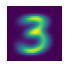

In [27]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

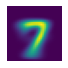

In [28]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);


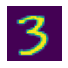

In [53]:
a_3 = stacked_threes[1]
show_image(a_3);

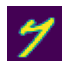

In [46]:
a_3 = stacked_sevens[1]
show_image(a_3);

In [54]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [55]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [57]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [58]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [67]:
tns+100


tensor([[101, 102, 103],
        [104, 105, 106]])

In [68]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [86]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [82]:
mean3.shape


torch.Size([28, 28])

In [112]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [75]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1192, 0.1446, 0.1225,  ..., 0.1125, 0.1176, 0.1277]),
 torch.Size([1010]))

In [89]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [113]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [114]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [118]:
is_3(valid_7_tens).float()

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [119]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))